<a href="https://colab.research.google.com/github/AdarshanandIITBHU/Machine-Learning-Intermediate-Learning-self/blob/main/end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd

In [10]:
df=pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [11]:
df=df.iloc[:,1:]

In [12]:
df.shape

(100, 3)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [14]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [15]:
import matplotlib.pyplot as plt

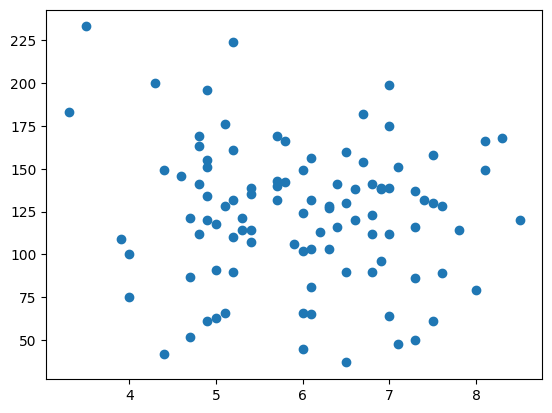

In [16]:
plt.scatter(df['cgpa'],df['iq'])

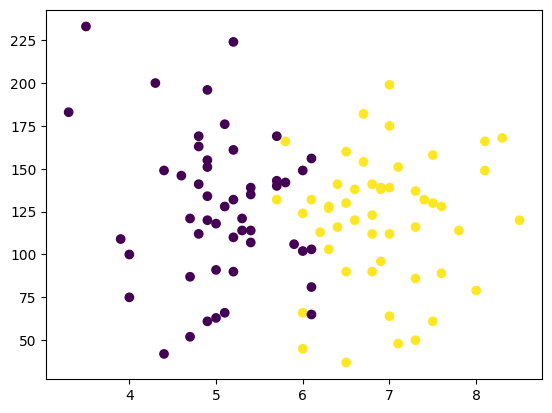

In [17]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [18]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [19]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [20]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)

In [22]:
X_train

,cgpa,iq
60,6.9,139.0
21,7.1,151.0
20,6.6,120.0
65,8.1,166.0
37,8.1,149.0
...,...,...
4,5.8,142.0
79,6.5,90.0
64,7.0,64.0
72,7.3,116.0


In [23]:
y_train

,placement
60,1
21,1
20,1
65,1
37,1
...,...
4,0
79,1
64,1
72,1


In [24]:
X_test

,cgpa,iq
88,4.4,149.0
22,4.9,120.0
85,5.8,166.0
47,5.2,161.0
12,5.4,139.0
68,4.0,75.0
96,4.4,42.0
53,8.3,168.0
56,6.1,65.0
2,5.3,121.0


In [25]:
y_test

,placement
88,0
22,0
85,1
47,0
12,0
68,0
96,0
53,1
56,0
2,0


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

In [28]:
X_train=scaler.fit_transform(X_train)

In [29]:
X_test=scaler.transform(X_test)

In [30]:
X_train

array([[ 7.53929840e-01,  3.83360832e-01],
       [ 9.33199816e-01,  6.88242789e-01],
       [ 4.85024878e-01, -9.93689343e-02],
       [ 1.82954969e+00,  1.06934524e+00],
       [ 1.82954969e+00,  6.37429130e-01],
       [ 3.68499394e-02,  2.05513023e-01],
       [ 3.95389890e-01,  9.16904258e-01],
       [-1.84548480e+00, -6.07505530e-01],
       [-9.49134925e-01, -1.50182594e-01],
       [ 7.53929840e-01,  3.57954002e-01],
       [ 3.95389890e-01, -2.20813581e+00],
       [ 1.11246979e+00,  3.32547172e-01],
       [ 5.74659865e-01,  1.47585451e+00],
       [-1.03876991e+00,  6.88242789e-01],
       [ 7.53929840e-01, -7.09132849e-01],
       [-1.30767488e+00,  5.61208640e-01],
       [-8.59499937e-01, -1.47133774e+00],
       [-1.03876991e+00,  2.56326683e-01],
       [ 1.73991470e+00, -1.14104896e+00],
       [ 1.29173977e+00,  1.54699364e-01],
       [-1.12840490e+00,  9.93124747e-01],
       [ 8.43564828e-01,  1.90777062e+00],
       [-1.12840490e+00,  4.34174491e-01],
       [-9.

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
clf=LogisticRegression()

In [33]:
clf.fit(X_train,y_train)

LogisticRegression()

In [34]:
y_pred=clf.predict(X_test)

In [35]:
y_test

,placement
88,0
22,0
85,1
47,0
12,0
68,0
96,0
53,1
56,0
2,0


In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_pred)

0.8

In [38]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

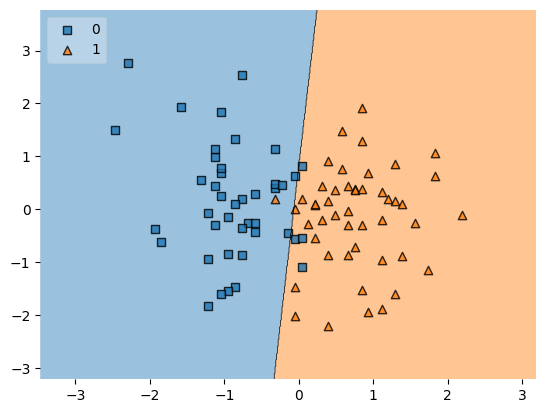

In [39]:
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)

In [40]:
import pickle

In [41]:
pickle.dump(clf,open('model.pkl','wb'))